In [1]:
try:
    import SEM_Image as SI
    
except ImportError:
    import sys
    # Python version 3.10.12 is the newest version supported
    !{sys.executable} -m pip install --user --upgrade matplotlib tifffile

Select the .tif file that you want to analyse.

Angle of rotation: 0
blackwhite = [0.126953125, 0.869140625]
Threshold Level = 0.572265625
Average Rotation Angle: 0.98 Degrees


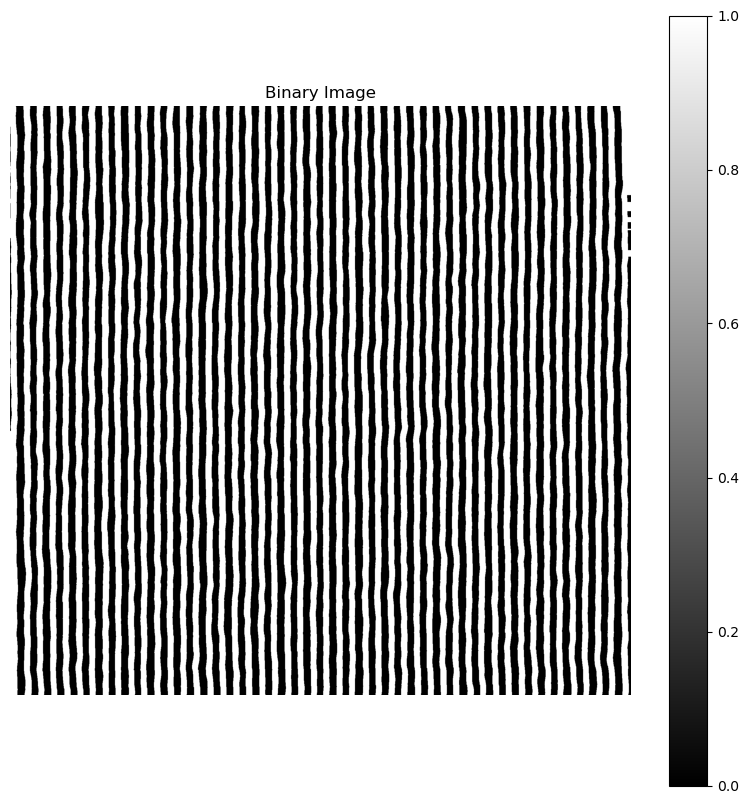

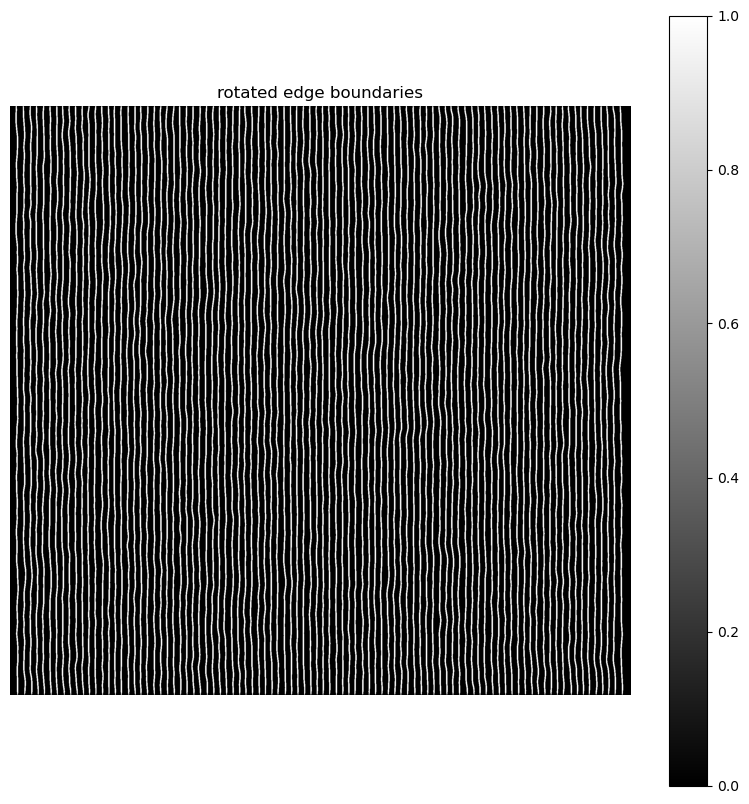

The space between lines 1 and 2 is a 'black' space


In [2]:
Image1 = SI.SEMImageDetails()  # Initializes all the variables for the object
Image1()  # This will run all the analysis

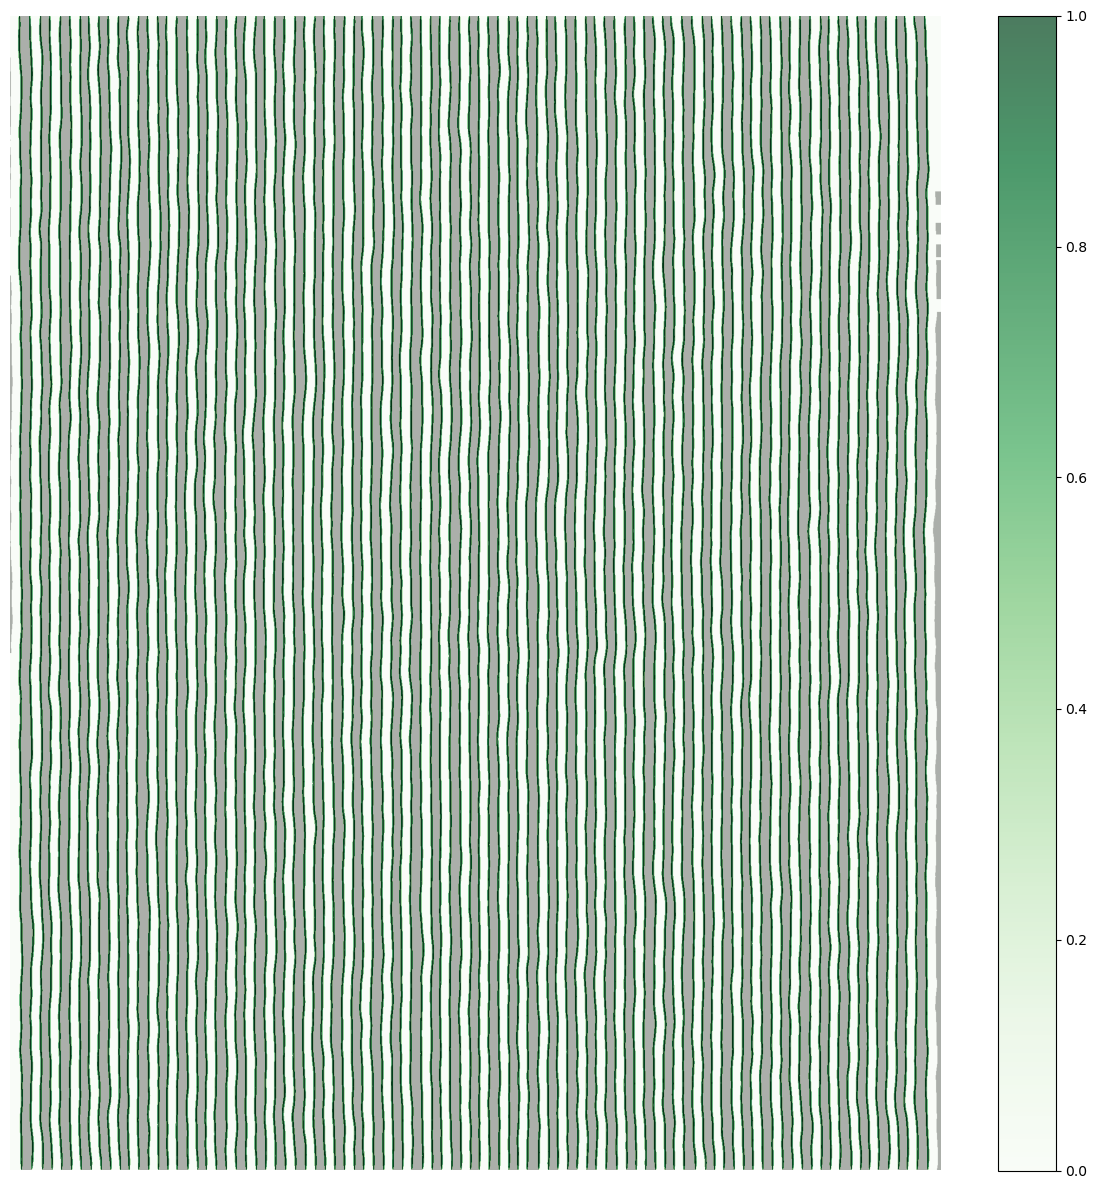

In [3]:
import CD_SEM_tools as tools
import CD_SEM_edges as edges
import numpy as np
import matplotlib.pyplot as plt

def custom_cmap():
    # Create a colormap with all non-zero entries as bright green and zero as black
    cmap = plt.cm.colors.ListedColormap(['black', 'limegreen'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    return cmap, norm

def display_images(top_image, bottom_image, figsize=(10, 10)):
     # Set the custom figure size
    plt.figure(figsize=figsize)

    # Plot the bottom image with the default 'gray' colormap (black for 0, white for 1)
    plt.imshow(bottom_image, cmap='gray', vmin=0, vmax=1, aspect='auto')

    # Plot the top image on top of the bottom image as bright green for non-zero values
    plt.imshow(top_image, cmap='Greens', alpha=0.7, aspect='auto')


    # Show the plot
    plt.axis('off')  # Turn off axis ticks and labels
    plt.colorbar()
    plt.show()


# Assuming you have the grayscale NumPy arrays named 'bottom_image_array' and 'top_image_array'
bottom_image = np.copy(Image1.image_binary)
top_image = edges.blackwhite_image(np.copy(Image1.image_boundaries), 0.5)

# Assuming you have 'top_image' and 'bottom_image' as grayscale np.array variables
display_images(top_image, bottom_image, figsize=(15, 15))
